# Optimización

## Optimización numérica

### Método newton

El método de Newton es un algoritmo iterativo que utiliza la información de la primera y segunda derivadas de la función para encontrar el mínimo. Es conocido por su rápida convergencia cuando se está cerca del mínimo, pero requiere el cálculo de la matriz Hessiana, que puede ser computacionalmente costoso.

In [1]:
import numpy as np
from scipy.optimize import minimize

# Definir la función y su gradiente
def f(x):
    return x[0]**2 + x[1]**2

def grad_f(x):
    return np.array([2*x[0], 2*x[1]])

def hess_f(x):
    return np.array([[2, 0], [0, 2]])

# Condiciones iniciales
x0 = np.array([1, 2])

# Minimizar utilizando el método de Newton
res = minimize(f, x0, method='Newton-CG', jac=grad_f, hess=hess_f)

print(res.x)  # Imprime el valor óptimo de x

[0. 0.]


### Método del Descenso de Gradiente



El método del descenso de gradiente es un algoritmo iterativo que actualiza los parámetros en la dirección del gradiente negativo de la función. Es más sencillo de implementar que el método de Newton, pero puede converger más lentamente.

In [2]:
# Minimizar utilizando el método del descenso de gradiente
res1 = minimize(f, x0, method='BFGS', jac=grad_f)
print(res1.x)

[0.00000000e+00 2.22044605e-16]


### Métodos Cuasi-Newton



Los métodos cuasi-Newton son una clase de algoritmos que aproximan la matriz Hessiana utilizando información de gradientes calculados en iteraciones anteriores. Son una buena opción cuando el cálculo de la Hessiana exacta es costoso.

In [3]:
# Minimizar utilizando el método BFGS (un método cuasi-Newton)
res2 = minimize(f, x0, method='BFGS', jac=grad_f)
print(res2.x)

[0.00000000e+00 2.22044605e-16]


## Optimización con restricciones

### Problema


Minimizar: $$f(x,y) = x^2 + y^2$$ Sujeto a: $$x + y \geq 1$$

Este problema busca encontrar el punto más cercano al origen $(0,0)$ que se encuentre en la región definida por la desigualdad $x + y \geq 1$.



In [4]:
from scipy.optimize import minimize

def objective(x):
    return x[0]**2 + x[1]**2

# Función de restricción (la desigualdad debe ser menor o igual a 0)
def constraint(x):
    return 1 - (x[0] + x[1])

# Condiciones iniciales
x0 = np.array([0, 0])

# Definir las restricciones
con = {'type': 'ineq', 'fun': constraint}

# Minimizar
sol = minimize(objective, x0, constraints=con)

print(sol)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.0
       x: [ 0.000e+00  0.000e+00]
     nit: 1
     jac: [ 1.490e-08  1.490e-08]
    nfev: 3
    njev: 1


### Problema

Minimizar: $$f(x,y) = x^2 + y^2$$ Sujeto a: $$x + y  = 1$$

Este problema busca encontrar el punto más cercano al origen $(0,0)$ que se encuentre en la región definida por la desigualdad $x + y = 1$.

In [5]:
from scipy.optimize import minimize

def objective(x):
    return x[0]**2 + x[1]**2

# Función de restricción (la desigualdad debe ser menor o igual a 0)
def constraint(x):
    return (x[0] + x[1]) - 1

# Condiciones iniciales
x0 = np.array([0, 0])

# Definir las restricciones
con = {'type': 'eq', 'fun': constraint}

# Minimizar
sol = minimize(objective, x0, constraints=con)

print(sol)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.5
       x: [ 5.000e-01  5.000e-01]
     nit: 3
     jac: [ 1.000e+00  1.000e+00]
    nfev: 10
    njev: 3


# Optimización con pulp, cvxopt, pyomo

Para correr el probrama debes instalar los modulos 

```
pip install pyomo
pip install pulp
!apt-get install -y -qq glpk-utils
```
Si estas en mac debes instalar

```
brew install glpk
```


In [6]:
# importando modulos necesarios
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
import cvxopt
import pulp
from pyomo.environ import *
from pyomo.opt import SolverFactory
import pyomo.environ

np.random.seed(1984) #replicar random
%matplotlib inline

ModuleNotFoundError: No module named 'cvxopt'

## Ejemplo

Optimizar

$$f(x)=(x_1−1)^2−(x_2−1)^2 $$
sujeto a  
$$2≤x_1≤3$$ y $$0≤x_2≤2$$
este tipo de problema se puede resolver utilizando el método L-BFGS-B que nos ofrece scipy.optimize.

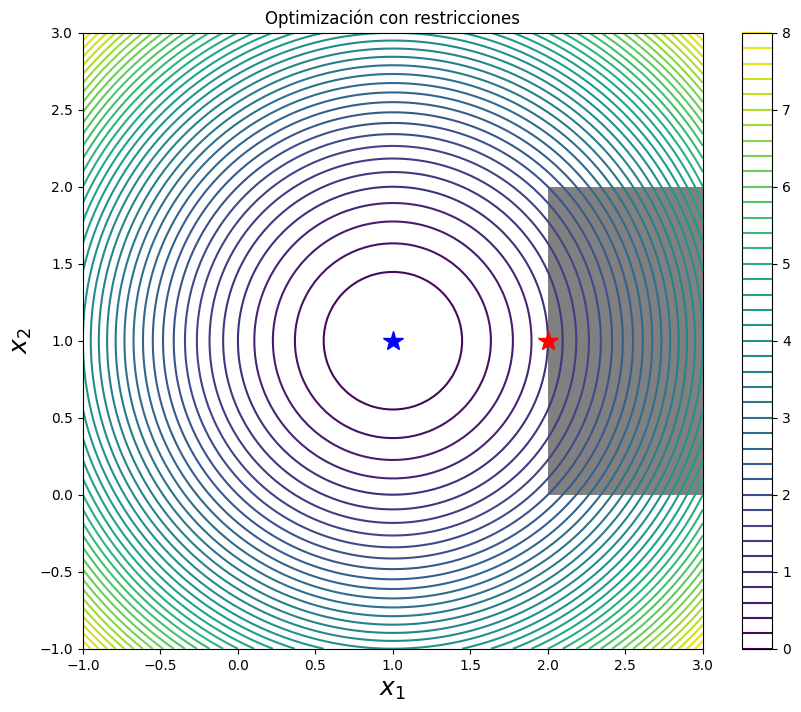

In [4]:
# defino una funcion de ayuda para subregion en el gráfico
def func_X_Y_to_XY(f, X, Y):
    """
    Wrapper for f(X, Y) -> f([X, Y])
    """
    s = np.shape(X)
    return f(np.vstack([X.ravel(), Y.ravel()])).reshape(*s)

# función a minimizar
def f(X):
    x, y = X
    return (x - 1)**2 + (y - 1)**2

# minimizo la función si restricciones
x_opt = optimize.minimize(f, (1, 1), method='BFGS').x

# el mínimo para las restricciones
bnd_x1, bnd_x2 = (2, 3), (0, 2)
x_cons_opt = optimize.minimize(f, np.array([1, 1]), method='L-BFGS-B',
bounds=[bnd_x1, bnd_x2]).x

# graficando la solución
fig, ax = plt.subplots(figsize=(10, 8))
x_ = y_ = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, func_X_Y_to_XY(f, X, Y), 50)
ax.plot(x_opt[0], x_opt[1], 'b*', markersize=15)
ax.plot(x_cons_opt[0], x_cons_opt[1], 'r*', markersize=15)
bound_rect = plt.Rectangle((bnd_x1[0], bnd_x2[0]),
bnd_x1[1] - bnd_x1[0], bnd_x2[1] - bnd_x2[0],
facecolor="grey")
ax.add_patch(bound_rect)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
plt.colorbar(c, ax=ax)
ax.set_title('Optimización con restricciones')
plt.show()

## Ejemplo

Volviendo al ejemplo anterior, se puede cambiar la restricción por una más compleja, como ser:

$$g(x)=x_1−1.75−(x_0−0.75)^4≥0$$

Para resolver este problema scipy.optimize nos ofrece un método llamado programación secuencial por mínimos cuadrados, o SLSQP por su abreviatura en inglés.

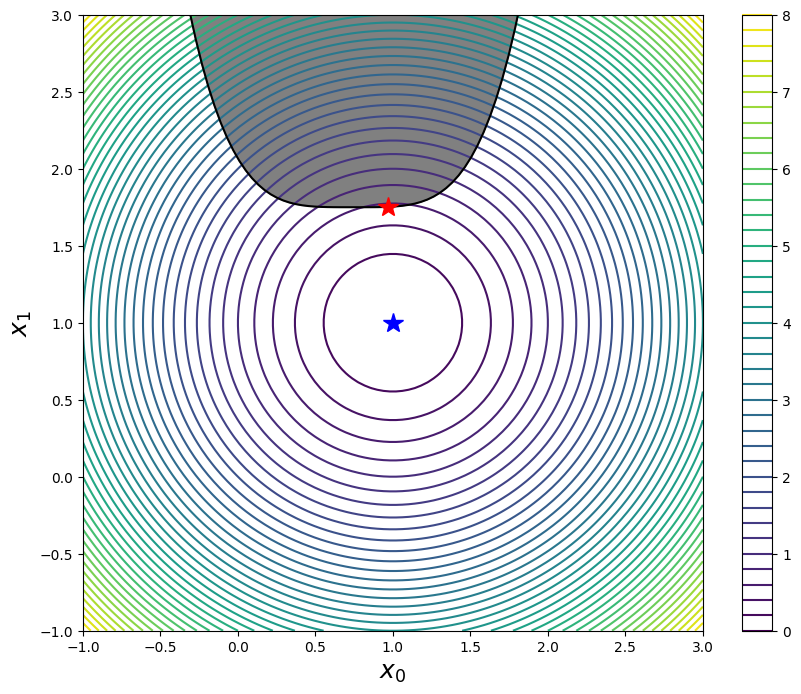

In [5]:
# Ejemplo scipy SLSQP
# funcion de restriccion
def g(X):
    return X[1] - 1.75 - (X[0] - 0.75)**4

# definimos el diccionario con la restricción
restriccion = dict(type='ineq', fun=g)

# resolvemos
x_opt = optimize.minimize(f, (0, 0), method='BFGS').x
x_cons_opt = optimize.minimize(f, (0, 0), method='SLSQP',
                               constraints=restriccion).x

# graficamos
ig, ax = plt.subplots(figsize=(10, 8))
x_ = y_ = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, func_X_Y_to_XY(f, X, Y), 50)
ax.plot(x_opt[0], x_opt[1], 'b*', markersize=15)
ax.plot(x_, 1.75 + (x_-0.75)**4, 'k-', markersize=15)
ax.fill_between(x_, 1.75 + (x_-0.75)**4, 3, color='grey')
ax.plot(x_cons_opt[0], x_cons_opt[1], 'r*', markersize=15)
ax.set_ylim(-1, 3)
ax.set_xlabel(r"$x_0$", fontsize=18)
ax.set_ylabel(r"$x_1$", fontsize=18)
plt.colorbar(c, ax=ax)
plt.show()

# Problema Transporte

El problema de transporte es un problema clásico de programación lineal en el cual se debe minimizar el costo del abastecimiento a una serie de puntos de demanda a partir de un grupo de puntos de oferta, teniendo en cuenta los distintos precios de envío de cada punto de oferta a cada punto de demanda.

## Ejemplo

Supongamos que tenemos que enviar cajas de cervezas de 2 cervecerías a 5 bares de acuerdo al siguiente gráfico:

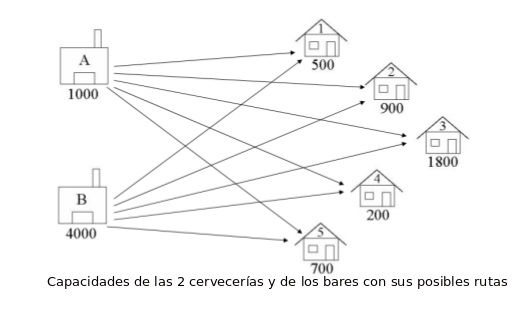

Asimismo, supongamos que nuestro gerente financiero nos informa que el costo de transporte por caja de cada ruta se conforma de acuerdo a la siguiente tabla:

\begin{equation}
\begin{pmatrix}
& |&Bar_1&Bar_2&Bar_3&Bar_4&Bar_5 \\
Cer_A &|& 2 & 4 & 5 & 2 & 1 \\
Cer_b&|& 3 & 1 & 3 & 2 & 3 \\
\end{pmatrix}
\end{equation}


Y por último, las restricciones del problema, van a estar dadas por las capacidades de oferta y demanda de cada cervecería y cada bar, las cuales se detallan en el gráfico de más arriba.

Veamos como podemos modelar este ejemplo con la ayuda de PuLP y de Pyomo.

In [12]:
# importando modulos necesarios
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
import cvxopt
import pulp
from pyomo.environ import *
from pyomo.opt import SolverFactory
import pyomo.environ

np.random.seed(1984) #replicar random
%matplotlib inline

### Problema de transporte de las cervezas utilizando pulp

In [3]:
# Creamos la variable prob que contiene los datos del problema
prob = pulp.LpProblem("Problema de distribución de cerveza", pulp.LpMinimize)

In [4]:
# Creamos lista de cervecerías o nodos de oferta
cervecerias = ["Cervecería A", "Cervercería B"]

# diccionario con la capacidad de oferta de cada cerveceria
oferta = {"Cervecería A": 1000,
          "Cervercería B": 4000}

# Creamos la lista de los bares o nodos de demanda
bares = ["Bar 1", "Bar 2", "Bar 3", "Bar 4", "Bar 5"]

# diccionario con la capacidad de demanda de cada bar
demanda = {"Bar 1":500,
           "Bar 2":900,
           "Bar 3":1800,
           "Bar 4":200,
           "Bar 5":700,}

# Lista con los costos de transporte de cada nodo
costos = [   #Bares
         #1 2 3 4 5
         [2,4,5,2,1],#A   Cervecerías
         [3,1,3,2,3] #B
         ]

# Convertimos los costos en un diccionario de PuLP
costos = pulp.makeDict([cervecerias, bares], costos,0)

# Creamos una lista de tuplas que contiene todas las posibles rutas de tranporte.
rutas = [(c,b) for c in cervecerias for b in bares]

# creamos diccionario x que contendrá la candidad enviada en las rutas
x = pulp.LpVariable.dicts("ruta", (cervecerias, bares),
                        lowBound = 0,
                        cat = pulp.LpInteger)

# Agregamos la función objetivo al problema
prob += sum([x[c][b]*costos[c][b] for (c,b) in rutas]), \
            "Suma_de_costos_de_transporte"

# Agregamos la restricción de máxima oferta de cada cervecería al problema.
for c in cervecerias:
    prob += sum([x[c][b] for b in bares]) <= oferta[c], \
            "Suma_de_Productos_que_salen_de_cervecerias_%s"%c

# Agregamos la restricción de demanda mínima de cada bar
for b in bares:
    prob += sum([x[c][b] for c in cervecerias]) >= demanda[b], \
    "Sum_of_Products_into_Bar%s"%b

# Los datos del problema son exportado a archivo .lp
prob.writeLP("problemaDeTransporte.lp")

# Resolviendo el problema.
prob.solve()

# Imprimimos el estado del problema.
print("Status: {}".format(pulp.LpStatus[prob.status]))

# Imprimimos cada variable con su solución óptima.
for v in prob.variables():
    print("{0:} = {1:}".format(v.name, v.varValue))

# Imprimimos el valor óptimo de la función objetivo
print("Costo total de transporte = {}".format(prob.objective.value()))




Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/marlong/Library/Python/3.10/lib/python/site-packages/pulp/apis/../solverdir/cbc/osx/i64/cbc /var/folders/gy/tr524sw56ynd5kmftbk5d2nw0000gn/T/1b28e78638da46ff88eddffaa506b612-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/gy/tr524sw56ynd5kmftbk5d2nw0000gn/T/1b28e78638da46ff88eddffaa506b612-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 63 RHS
At line 71 BOUNDS
At line 82 ENDATA
Problem MODEL has 7 rows, 10 columns and 20 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 8600 - 0.00 seconds
Cgl0004I processed model has 7 rows, 10 columns (10 integer (0 of which binary)) and 20 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0012I Integer solution of 8600 found by DiveCoefficient after 0 iterations and 0 nodes (0.01 seconds)


Como se ve, la solución óptima que encontramos con la ayuda de PuLP, nos dice que deberíamos enviar desde la Cervecería A, 300 cajas al Bar 1 y 700 cajas al Bar 5; y que desde la Cervecería B deberíamos enviar 200 cajas al Bar 1, 900 cajas al Bar 2, 1800 cajas al Bar 3 y 200 cajas al Bar 4. De esta forma podemos minimizar el costo de transporte a un total de 8600.



### Problema de transporte de las cervezas utilizando Pyomo

In [14]:
from pyomo.environ import *
import cvxopt

# Crear modelo
modelo = ConcreteModel()

# Sets de oferta y demanda
modelo.i = Set(initialize=['Cervecería A','Cervecería B'])
modelo.j = Set(initialize=['Bar 1', 'Bar 2', 'Bar 3', 'Bar 4', 'Bar 5'])

# Parámetros de oferta y demanda
modelo.a = Param(modelo.i, initialize={'Cervecería A':1000,'Cervecería B':4000})
modelo.b = Param(modelo.j, initialize={'Bar 1':500,'Bar 2':900,'Bar 3':1800,'Bar 4':200, 'Bar 5':700})

# Costo de transporte
costos = {
    ('Cervecería A', 'Bar 1'): 2, ('Cervecería A', 'Bar 2'): 4, ('Cervecería A', 'Bar 3'): 5,
    ('Cervecería A', 'Bar 4'): 2, ('Cervecería A', 'Bar 5'): 1,
    ('Cervecería B', 'Bar 1'): 3, ('Cervecería B', 'Bar 2'): 1, ('Cervecería B', 'Bar 3'): 3,
    ('Cervecería B', 'Bar 4'): 2, ('Cervecería B', 'Bar 5'): 3
}
modelo.c = Param(modelo.i, modelo.j, initialize=costos)

# Variable de decisión
modelo.x = Var(modelo.i, modelo.j, domain=NonNegativeReals)

# Función objetivo
def f_objetivo(modelo):
    return sum(modelo.c[i,j] * modelo.x[i,j] for i in modelo.i for j in modelo.j)
modelo.objetivo = Objective(rule=f_objetivo, sense=minimize)

# Restricción de oferta
def restriccion_oferta(modelo, i):
    return sum(modelo.x[i, j] for j in modelo.j) <= modelo.a[i]
modelo.restriccion_oferta = Constraint(modelo.i, rule=restriccion_oferta)

# Restricción de demanda
def restriccion_demanda(modelo, j):
    return sum(modelo.x[i, j] for i in modelo.i) == modelo.b[j]
modelo.restriccion_demanda = Constraint(modelo.j, rule=restriccion_demanda)

# Resolver el modelo
solver = SolverFactory('glpk')  # usa el path completo solo si es necesario
resultados = solver.solve(modelo)

# Mostrar resultados
modelo.x.display()


x : Size=10, Index=i*j
    Key                       : Lower : Value  : Upper : Fixed : Stale : Domain
    ('Cervecería A', 'Bar 1') :     0 :  300.0 :  None : False : False : NonNegativeReals
    ('Cervecería A', 'Bar 2') :     0 :    0.0 :  None : False : False : NonNegativeReals
    ('Cervecería A', 'Bar 3') :     0 :    0.0 :  None : False : False : NonNegativeReals
    ('Cervecería A', 'Bar 4') :     0 :    0.0 :  None : False : False : NonNegativeReals
    ('Cervecería A', 'Bar 5') :     0 :  700.0 :  None : False : False : NonNegativeReals
    ('Cervecería B', 'Bar 1') :     0 :  200.0 :  None : False : False : NonNegativeReals
    ('Cervecería B', 'Bar 2') :     0 :  900.0 :  None : False : False : NonNegativeReals
    ('Cervecería B', 'Bar 3') :     0 : 1800.0 :  None : False : False : NonNegativeReals
    ('Cervecería B', 'Bar 4') :     0 :  200.0 :  None : False : False : NonNegativeReals
    ('Cervecería B', 'Bar 5') :     0 :    0.0 :  None : False : False : NonNegativeRea